In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
## Null Values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- No Missing values can present in dataset

In [8]:
## Information of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
legal = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legal_percentage = (legal / (fraud + legal)) * 100
fraud_percentage = (fraud / (fraud + legal)) * 100

print("Number of Legal Transaction: ", legal)
print("Number of Fraud Transactions: ", fraud)
print("Percentage of Legal Transactions: {:.4f} %".format(legal_percentage))
print("Percentage of Fraud Transactions: {:.4f} %".format(fraud_percentage))

Number of Legal Transaction:  6354407
Number of Fraud Transactions:  8213
Percentage of Legal Transactions: 99.8709 %
Percentage of Fraud Transactions: 0.1291 %


- These results demonstrate that the dataset is highly skewed, with legitimate transactions accounting for 99.87% and fraudulent transactions comprising only 0.13%. Therefore, Decision Trees and Random Forests are well-suited for handling such imbalanced datasets.

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Visulaization

Text(0, 0.5, 'count of online transaction type ')

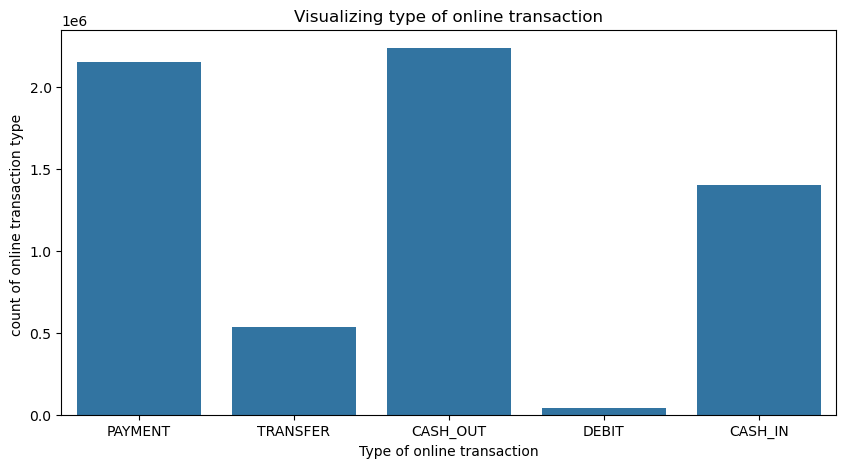

In [22]:
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= df)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

- The chart reveals that cash_out and payment are the most frequently used types of online transactions by customers.

<Axes: xlabel='amount', ylabel='Count'>

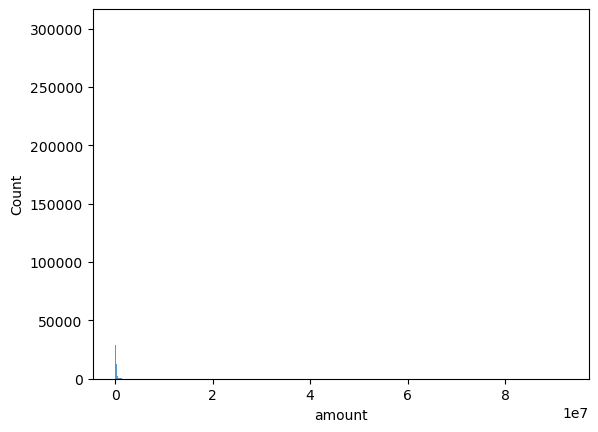

In [26]:
# Visualization for amount column

sns.histplot(x= "amount", data =df)

<Axes: xlabel='type', ylabel='amount'>

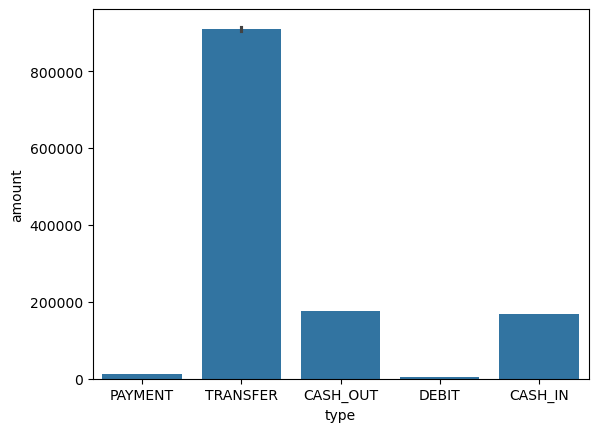

In [30]:
sns.barplot(x='type',y='amount',data=df)

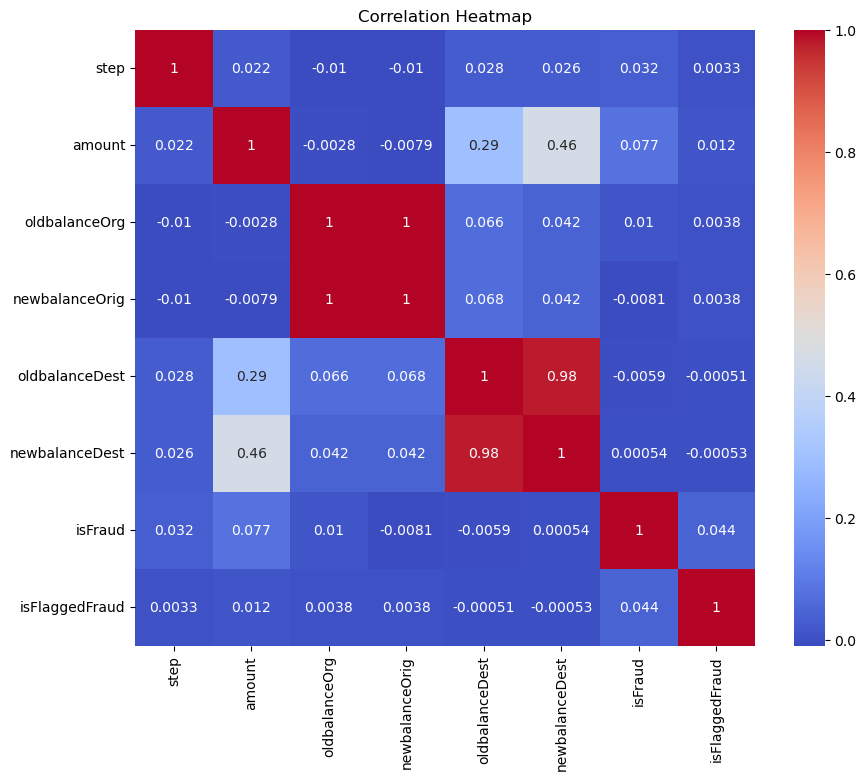

In [41]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- NUMBER OF LEGAL AND FRAUD TRANSACTIONS


## Model Selection

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [57]:
data=df.copy()
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [59]:
object_List = data.select_dtypes(include = "object").columns
print (object_List)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [63]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for feat in object_List:
    data[feat] = LE.fit_transform(data[feat].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [64]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [71]:
scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["amount"].values.reshape(-1, 1))
data.drop(["amount"], inplace= True, axis= 1)

Y = data["isFraud"]
X = data.drop(["isFraud"], axis= 1)

- I chose not to normalize the entire dataset, as it could potentially reduce the model's accuracy.

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

In [90]:
print('Random Forest Classfier')
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=100, random_state=12,max_depth=5)
rf.fit(X_train,Y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(Y_test, rf_predicted)
rf_acc_score = accuracy_score(Y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(Y_test,rf_predicted))

Random Forest Classfier
confussion matrix
[[1906351       0]
 [   1401    1034]]


Accuracy of Random Forest: 99.92660256309507 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       1.00      0.42      0.60      2435

    accuracy                           1.00   1908786
   macro avg       1.00      0.71      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



In [92]:
print('DecisionTreeClassifier')
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(Y_test, dt_predicted)
dt_acc_score = accuracy_score(Y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(Y_test,dt_predicted))

DecisionTreeClassifier
confussion matrix
[[1906160     191]
 [    660    1775]]


Accuracy of DecisionTreeClassifier: 99.95541668893213 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.90      0.73      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.86      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



In [98]:
model_ev = pd.DataFrame({'Model': ['Random Forest','Decision Tree',], 'Accuracy': [rf_acc_score*100,dt_acc_score*100,]})

In [100]:
model_ev

,Model,Accuracy
0,Random Forest,99.926603
1,Decision Tree,99.955417


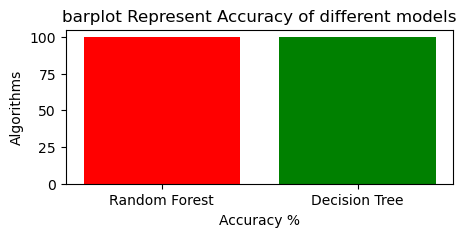

In [108]:
colors = ['red','green']
plt.figure(figsize=(5,2))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

## Conclusion

The accuracy of both Random Forest and Decision Tree models is found to be similar. However, Random Forest demonstrates higher precision. In fraud detection, precision holds greater significance because identifying fraudulent transactions correctly is more crucial than simply recognizing legitimate transactions. Failing in either aspect—falsely marking legitimate transactions as fraudulent or missing fraudulent ones—can lead to serious consequences, such as penalizing innocent individuals or letting fraudsters go undetected. This underscores why Random Forest and Decision Tree are preferred over other algorithms in such scenarios.

The choice of Random Forest is also influenced by the nature of the dataset, which is highly imbalanced (Legitimate: Fraudulent :: 99.87:0.13). Random Forest constructs multiple decision trees, enabling the model to analyze the data comprehensively. While this approach may be time-intensive, it simplifies decision-making compared to the Boolean approach of a single Decision Tree.

On the other hand, models like XGBoost, Bagging, ANN, and Logistic Regression might provide high accuracy but tend to fall short in delivering strong precision and recall metrics, which are critical for fraud detection.

## Key factors predicting fraudulent customers:
- Whether the request source is secure.
- Legitimacy of the organization requesting money.
- Vendor transaction history.
## Preventive measures for companies updating their infrastructure:
- Use only verified and secure applications.
- Access websites through secure connections.
- Utilize VPNs and other secure internet options.
- Regularly update the security of devices (mobile phones, laptops, etc.).
- Avoid responding to unsolicited calls, messages, or emails.
- Immediately notify your bank if you suspect a security breach.
## Evaluating the effectiveness of these measures:
- Banks can send regular e-statements to their customers.
- Customers should frequently monitor their account activity.
- Maintain a detailed log of all payments and transactions.